# Water Quality Classification
## By Mohamed Farah

References: https://scikit-learn.org/stable/

In [16]:
import sys
import math

import numpy
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter
numpy.set_printoptions(threshold=sys.maxsize)
simplefilter("ignore", category=UserWarning)

In [17]:
# https://www.kaggle.com/datasets/mssmartypants/water-quality
url = 'https://raw.githubusercontent.com/Seto53/water-quality/main/water_quality.csv'
wq = pd.read_csv(url)
X = wq.loc[:, 'aluminium':'uranium'].values
y = wq['is_safe'].values

# Classification Task

We decided to use a dataset that shows water quality depending on the water's ingredients and quantity. Our goal is to find if the water quality is safe or not depending on the quantity of the ingredients listed above. Our model can be applied in a real-life scenario where a sample and analysis of water could tell us if it is safe to drink or not.

This is a binary classification as we are only looking for one binary class.

# Dataset Analysis

The dataset includes water ingredients: aluminum, ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, fluoride, bacteria, viruses, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, and uranium. Here is a preview of the dataset:

In [18]:
wq.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


The number of training examples and features:

In [19]:
wq.shape

(7996, 21)

The types of each feature:

In [20]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

The count of the 'is_safe' class:

In [21]:
wq['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

# Attributes Brainstorm

All the attributes seem to be useful for the objective of finding the safety of a water sample.

# Features Encoding

All the attributes are continuous; except for the is_safe class which is binary. We do not need to encode any features.

# Cross-validation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Three Models Default Parameters

In [23]:
print("Naïve Bayes model with default parameters: ")
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy: ", gnb.score(X_test, y_test))

Naïve Bayes model with default parameters: 
Number of mislabeled points out of a total 1600 points : 235
Accuracy:  0.853125


In [24]:
print("Logistic Regression model with default parameters: ")
clr = LogisticRegression(max_iter=9999)
y_pred = clr.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy: ", clr.score(X_test, y_test))

Logistic Regression model with default parameters: 
Number of mislabeled points out of a total 1600 points : 150
Accuracy:  0.90625


In [25]:
print("Multi-Layer Perceptron model with default parameters: ")
mlp = MLPClassifier(max_iter=9999)
y_pred = mlp.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy: ", mlp.score(X_test, y_test))

Multi-Layer Perceptron model with default parameters: 
Number of mislabeled points out of a total 1600 points : 98
Accuracy:  0.93875


# Precision/Recall Evaluation

In [26]:
print("Naïve Bayes model classification report (default parameters): ")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

Naïve Bayes model classification report (default parameters): 
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1439
           1       0.37      0.65      0.47       161

    accuracy                           0.85      1600
   macro avg       0.66      0.76      0.69      1600
weighted avg       0.90      0.85      0.87      1600


In [27]:
print("Logistic Regression model classification report (default parameters): ")
clr = LogisticRegression(max_iter=9999)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

Logistic Regression model classification report (default parameters): 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1439
           1       0.57      0.28      0.37       161

    accuracy                           0.91      1600
   macro avg       0.75      0.63      0.66      1600
weighted avg       0.89      0.91      0.89      1600


In [28]:
print("Multi-Layer Perceptron model classification report (default parameters): ")
mlp = MLPClassifier(max_iter=9999)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

Multi-Layer Perceptron model classification report (default parameters): 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1439
           1       0.72      0.70      0.71       161

    accuracy                           0.94      1600
   macro avg       0.84      0.83      0.84      1600
weighted avg       0.94      0.94      0.94      1600


# Naïve Bayes Parameter Optimization

### Round 1

In [29]:
print("Optimizing Naive Bayes model, Round 1\n")

Optimizing Naive Bayes model, Round 1


Optimizing Naive Bayes model (var_smoothing parameter) with trial and error: 
The plot shows that the best value for var_smoothing is 1*e^(-4) with an accuracy of 0.899375


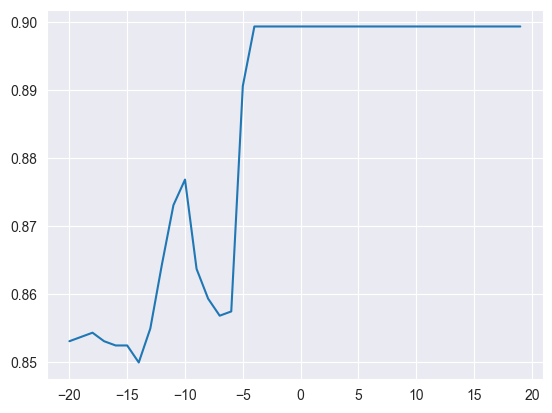

In [30]:
print("Optimizing Naive Bayes model (var_smoothing parameter) with trial and error: ")
paramX = []
paramY = []
for i in range(-20, 20):
    gnb = GaussianNB(var_smoothing=math.exp(i))
    gnb.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(gnb.score(X_test, y_test))
plt.plot(paramX, paramY)
print("The plot shows that the best value for var_smoothing is 1*e^(" + str(
    paramX[paramY.index(max(paramY))]) + ") with an accuracy of " + str(max(paramY)))
print()
plt.show()

We can see that the result that we got is better than the result that we had with the Naive Bayes with default parameters.
We can now assume that we got better result because we optimized the var_smoothing variable.
We can then assume that this is a good result (False Positives).

### Round 2

In [31]:
print("Optimizing Naive Bayes model, Round 2\n")

Optimizing Naive Bayes model, Round 2


In [32]:
print("Optimizing Naive Bayes model (var_smoothing parameter) GridSearchCV: ")
paramVarSmoothing = [math.exp(-i) for i in range(-20, 20)]
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': paramVarSmoothing}
gs_NB = GridSearchCV(estimator=nb_classifier,
                     param_grid=params_NB,
                     verbose=1,
                     scoring='accuracy')
gs_NB.fit(X_train, y_train)
print("The best parameters are: " + str(gs_NB.best_params_))
print("The best accuracy is: " + str(gs_NB.best_score_))
print("The best model is: " + str(gs_NB.best_estimator_))
print("The accuracy of the best model is: " + str(gs_NB.best_estimator_.score(X_test, y_test)))

Optimizing Naive Bayes model (var_smoothing parameter) GridSearchCV: 
Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best parameters are: {'var_smoothing': 485165195.4097903}
The best accuracy is: 0.8825829505473026
The best model is: GaussianNB(var_smoothing=485165195.4097903)
The accuracy of the best model is: 0.899375


In [33]:
print("The overall best parameters are: var_smoothing = 1*e^(i) with -4<=i<=20")
print("Let us try with a different parameter that isn't equal to 20 but is still in the intervall -4 to 20 which is 10")
gnb = GaussianNB(var_smoothing=math.exp(10))
gnb.fit(X_train, y_train)
print("With an accuracy of: " + str(gnb.score(X_test, y_test)))

The overall best parameters are: var_smoothing = 1*e^(i) with -4<=i<=20
Let us try with a different parameter that isn't equal to 20 but is still in the intervall -4 to 20 which is 10
With an accuracy of: 0.899375


We can see that we got the same result as the first round by using the GridSearch function. The result are the same because the interval for the parameter that we found in the first round was optimal. We can then assume that this is a good result (False Positives). By modifying the default version of Naive Bayes we were able to get different results.

# Logistic Regression Parameter Optimization

In [34]:
print(
    "Optimizing Logistic Regression model. We will first try to find the optimal penalty and solver, then optimize the parameters"
    "\nthat are supported by the solver. We will not optimize the following parameters: class_weight, max_iter, \n"
    "verbose, warm_start, n_jobs")

Optimizing Logistic Regression model. We will first try to find the optimal penalty and solver, then optimize the parameters
that are supported by the solver. We will not optimize the following parameters: class_weight, max_iter, 
verbose, warm_start, n_jobs


### Round 1

In [35]:
print("Optimizing Logistic Regression model, Round 1")

Optimizing Logistic Regression model, Round 1


Optimizing Logistic Regression model (penalty parameter) with trial and error: 
The plot shows that the best value for penalty is none with an accuracy of 0.913125


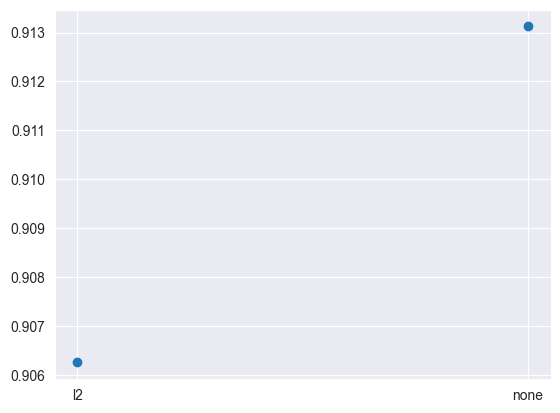

In [36]:
print("Optimizing Logistic Regression model (penalty parameter) with trial and error: ")
paramX = []
paramY = []
paramPenalty = ['l2', 'none']
for i in paramPenalty:
    clr = LogisticRegression(max_iter=9999, penalty=i)
    clr.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(clr.score(X_test, y_test))
plt.scatter(paramX, paramY)
print("The plot shows that the best value for penalty is " + str(
    paramX[paramY.index(max(paramY))]) + " with an accuracy of " + str(max(paramY)))
print()
plt.show()

Optimizing Logistic Regression model (solver parameter) with trial and error: 
The plot shows that the best value for solver is lbfgs with an accuracy of 0.913125


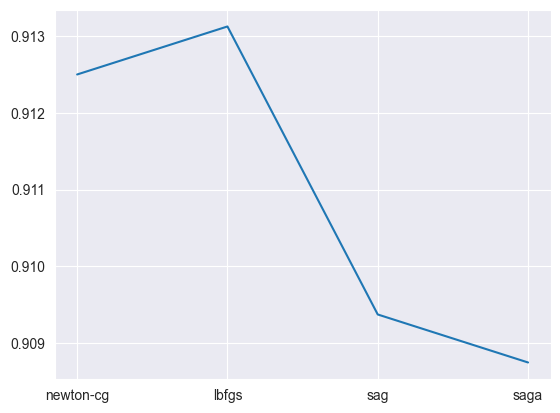

In [37]:
print("Optimizing Logistic Regression model (solver parameter) with trial and error: ")
paramX = []
paramY = []
paramSolver = ['newton-cg', 'lbfgs', 'sag', 'saga']
for i in paramSolver:
    clr = LogisticRegression(max_iter=9999, solver=i, penalty='none')
    clr.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(clr.score(X_test, y_test))
plt.plot(paramX, paramY)
print("The plot shows that the best value for solver is " + str(
    paramX[paramY.index(max(paramY))]) + " with an accuracy of " + str(max(paramY)))
print()
plt.show()

In [38]:
print("Using lbfgs as solver, therefore ignoring the following parameters: dual, intercept_scaling, random_state")

Using lbfgs as solver, therefore ignoring the following parameters: dual, intercept_scaling, random_state


Optimizing Logistic Regression model (tol parameter) with trial and error: 
The plot shows that the best value for tol is 1*e^-10 with an accuracy of 0.90625


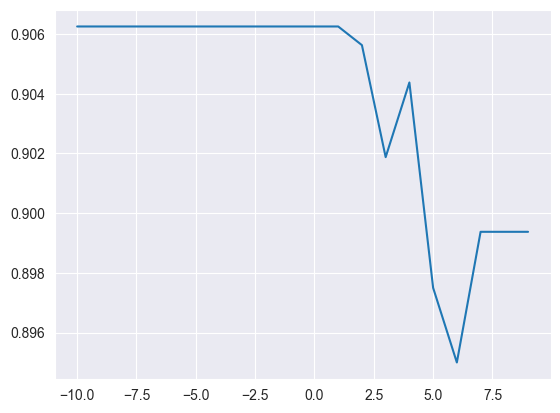

In [39]:
print("Optimizing Logistic Regression model (tol parameter) with trial and error: ")
paramX = []
paramY = []
for i in range(-10, 10):
    clr = LogisticRegression(max_iter=9999, tol=math.exp(i))
    clr.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(clr.score(X_test, y_test))
plt.plot(paramX, paramY)
print("The plot shows that the best value for tol is 1*e^" + str(
    paramX[paramY.index(max(paramY))]) + " with an accuracy of " + str(max(paramY)))
print()
plt.show()

Optimizing Logistic Regression model (C parameter) with trial and error: 
The plot shows that the best value for C is 92 with an accuracy of 0.91375


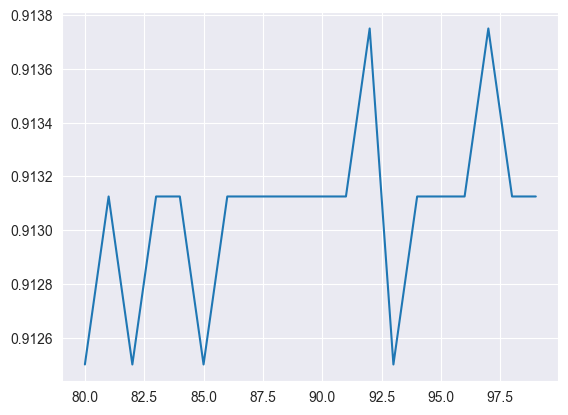

In [40]:
print("Optimizing Logistic Regression model (C parameter) with trial and error: ")
paramX = []
paramY = []
for i in range(80, 100):
    clr = LogisticRegression(max_iter=9999, C=i)
    clr.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(clr.score(X_test, y_test))
plt.plot(paramX, paramY)
print("The plot shows that the best value for C is " + str(
    paramX[paramY.index(max(paramY))]) + " with an accuracy of " + str(max(paramY)))
print()
plt.show()

Now we are going to use GridSearch function to find the best combination off parameters.

In [41]:
print("Optimizing Logistic Regression model with GridSearchCV (parameters: penalty, C, solver, tol): ")
paramPenalty = ['l2', 'none']
paramC = [i for i in range(89, 95)]
paramSolver = ['newton-cg', 'lbfgs', 'sag', 'saga']
paramTol = [math.exp(-i) for i in range(-2, 2)]

clr = LogisticRegression(max_iter=9999)
params_NB = {'penalty': paramPenalty, 'C': paramC, 'solver': paramSolver, 'tol': paramTol}
gs_LR = GridSearchCV(estimator=clr,
                     param_grid=params_NB,
                     verbose=1,
                     scoring='accuracy')
gs_LR.fit(X_train, y_train)
print("The best parameters are: " + str(gs_LR.best_params_))
print("The best accuracy is: " + str(gs_LR.best_score_))
print("The best model is: " + str(gs_LR.best_estimator_))
print("The accuracy of the best model is: " + str(gs_LR.best_estimator_.score(X_test, y_test)))

Optimizing Logistic Regression model with GridSearchCV (parameters: penalty, C, solver, tol): 
Fitting 5 folds for each of 192 candidates, totalling 960 fits
The best parameters are: {'C': 89, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.36787944117144233}
The best accuracy is: 0.9075980991008601
The best model is: LogisticRegression(C=89, max_iter=9999, tol=0.36787944117144233)
The accuracy of the best model is: 0.9125


In [42]:
print("The overall best parameters for round 1 are: max_iter=9999, C=89, tol=1e-1, solver='lbfgs'")
clr = LogisticRegression(max_iter=9999, C=92, tol=1e-4, solver="lbfgs")
clr.fit(X_train, y_train)
print("With an accuracy of: " + str(clr.score(X_test, y_test)))

The overall best parameters for round 1 are: max_iter=9999, C=89, tol=1e-1, solver='lbfgs'
With an accuracy of: 0.91375


By optimizing our variables by using the GridSearch function and trial and error for loops, we got a result that is better than the result we had for the Logistic Regression with the default parameter.
We got results that are good which is a false positives.

### Round 2

In [43]:
print("Optimizing Logistic Regression model, Round 2. Using the best parameters from Round 1")

Optimizing Logistic Regression model, Round 2. Using the best parameters from Round 1


Optimizing Logistic Regression model (fit_intercept parameter) with trial and error: 
The plot shows that the best value for fit_intercept is True with an accuracy of 0.91375


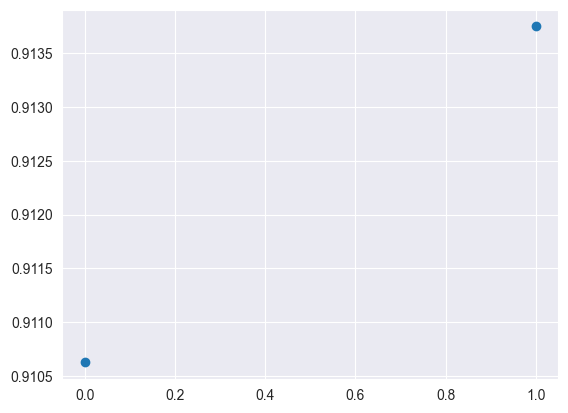

In [44]:
print("Optimizing Logistic Regression model (fit_intercept parameter) with trial and error: ")
paramX = []
paramY = []
paramFitIntercept = [True, False]
for i in paramFitIntercept:
    clr = LogisticRegression(max_iter=9999, C=92, tol=1e-4, solver="lbfgs", fit_intercept=i)
    clr.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(clr.score(X_test, y_test))
plt.scatter(paramX, paramY)
print("The plot shows that the best value for fit_intercept is " + str(
    paramX[paramY.index(max(paramY))]) + " with an accuracy of " + str(max(paramY)))
print()
plt.show()

Optimizing Logistic Regression model (multi_class parameter) with trial and error: 
The plot shows that the best value for multi_class is auto with an accuracy of 0.91375


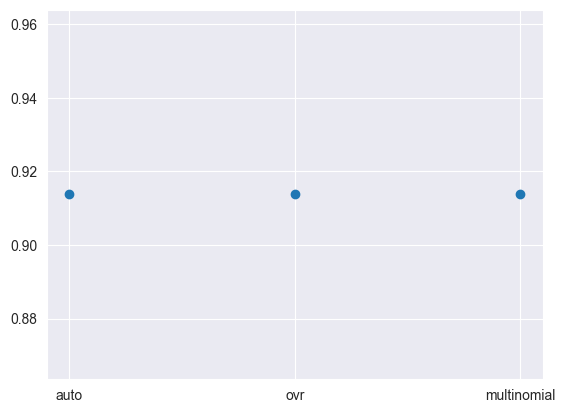

In [45]:
print("Optimizing Logistic Regression model (multi_class parameter) with trial and error: ")
paramX = []
paramY = []
paramMultiClass = ['auto', 'ovr', 'multinomial']
for i in paramMultiClass:
    clr = LogisticRegression(max_iter=9999, C=92, tol=1e-4, solver="lbfgs", multi_class=i)
    clr.fit(X_train, y_train)
    paramX.append(i)
    paramY.append(clr.score(X_test, y_test))
plt.scatter(paramX, paramY)
print("The plot shows that the best value for multi_class is " + str(
    paramX[paramY.index(max(paramY))]) + " with an accuracy of " + str(max(paramY)))
print()
plt.show()

In [46]:
print(
    "The overall best parameters for round 2 are: max_iter=9999, C=89, tol=1e-1, solver='lbfgs, fit_intercept=True, "
    "multi_class='auto'")
clr = LogisticRegression(max_iter=9999, C=92, tol=1e-4, solver="lbfgs", fit_intercept=True, multi_class='auto')
clr.fit(X_train, y_train)
print("With an accuracy of: " + str(clr.score(X_test, y_test)))

The overall best parameters for round 2 are: max_iter=9999, C=89, tol=1e-1, solver='lbfgs, fit_intercept=True, multi_class='auto'
With an accuracy of: 0.91375


Our result remains the same as the one we found in round 1 even though we optimized more parameters.
In spite of that, it is better than our default result.
We can conclude that our result is good therefore it is a False Positive.

# Multi-Layer Perceptron Parameter Optimization

In [47]:
print("Optimizing Multi-Layer Perceptron model. We will use the adam solver for the round 1, then use the lbfgs solver"
    " on round 2. Our parameters will include tol, solver, activation, hidden_layer, alpha and shuffle")

Optimizing Multi-Layer Perceptron model. We will use the adam solver for the round 1, then use the lbfgs solver on round 2. Our parameters will include tol, solver, activation, hidden_layer, alpha and shuffle


### Round 1

In [48]:
print("Optimizing Multi-Layer Perceptron model using solver adam, Round 1")

Optimizing Multi-Layer Perceptron model using solver adam, Round 1


Optimizing Multi-Layer Perceptron model (Activation parameter) with trial and error: 
The plot shows that the best value for activation is relu with an accuracy of 0.94875


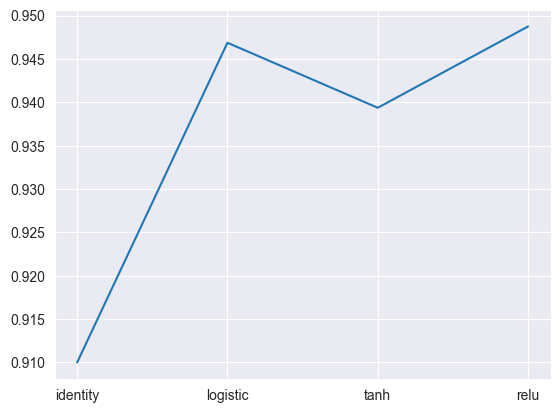

In [49]:
print("Optimizing Multi-Layer Perceptron model (Activation parameter) with trial and error: ")
param_X = []
param_Y = []
param_Activation = ['identity', 'logistic', 'tanh', 'relu']
for i in param_Activation:
    clr = MLPClassifier(max_iter=999999999, activation=i, solver='adam')
    clr.fit(X_train, y_train)
    param_X.append(i)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for activation is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
print()
plt.show()

Optimizing Multi-Layer Perceptron model (alpha parameter) with trial and error: 
The plot shows that the best value for alpha is 0.0027 with an accuracy of 0.94625


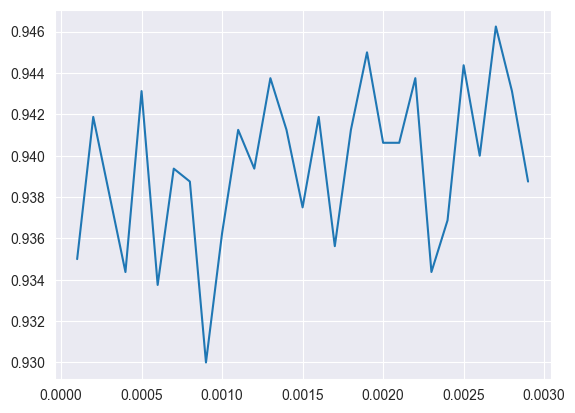

In [50]:
print("Optimizing Multi-Layer Perceptron model (alpha parameter) with trial and error: ")
param_X = []
param_Y = []
param_alpha = []
for i in range(1, 30):
    clr = MLPClassifier(max_iter=999999999, alpha=i/10000, solver='adam')
    clr.fit(X_train, y_train)
    param_X.append(i/10000)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for alpha is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
print()
plt.show()

Optimizing Multi-Layer Perceptron model (tol (tolerance) parameter) with trial and error: 
The plot shows that the best value for tol is e^(--28) with an accuracy of 0.949375


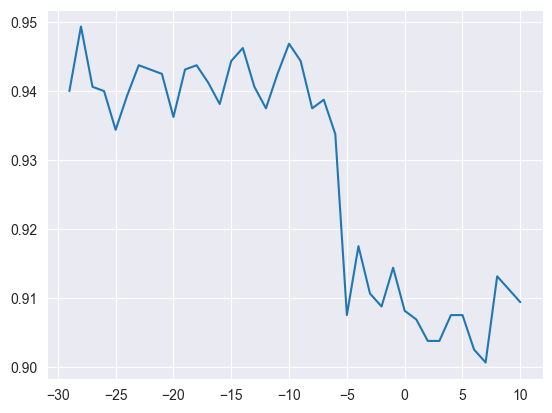

In [51]:
print("Optimizing Multi-Layer Perceptron model (tol (tolerance) parameter) with trial and error: ")
param_X = []
param_Y = []
for i in range(-10, 30):
    clr = MLPClassifier(max_iter=999999999, tol=math.exp(-i), solver='adam')
    clr.fit(X_train, y_train)
    param_X.append(-i)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for tol is e^(-" + str(
    param_X[param_Y.index(max(param_Y))]) + ") with an accuracy of " + str(max(param_Y)))
print()
plt.show()

In [52]:
print("Let's add our 3 new optimal parameters to the ones we got in the first part of round 1")
clr = MLPClassifier(max_iter=999999999, solver='adam', activation='logistic', alpha=0.0011, tol=math.exp(22))
clr.fit(X_train, y_train)
print(clr.score(X_test, y_test))

Let's add our 3 new optimal parameters to the ones we got in the first part of round 1
0.89625


Clearly, the parameters worked better separately.

The plot shows that the best number of layers for hidden_layer_sizes is [7, 7] with an accuracy of 0.955


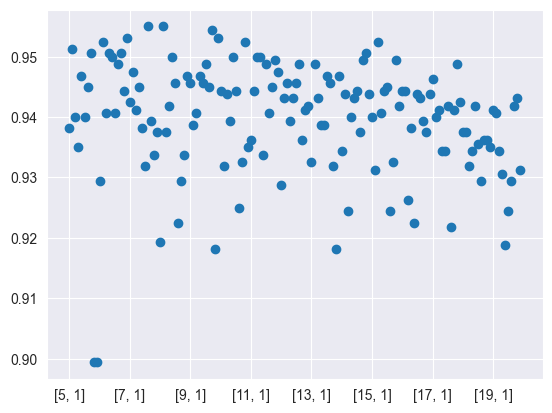

In [53]:
tempX = []
param_Y = []
for i in range(5, 20):
    nodes = ()
    for j in range(10):
        nodes = nodes + (i,)
        clr = MLPClassifier(max_iter=999999999, hidden_layer_sizes=nodes, solver='adam')
        clr.fit(X_train, y_train)
        tempX.append(nodes)
        param_Y.append(clr.score(X_test, y_test))
param_X = []
for t in tempX:
    param_X.append(str([t[0], len(t)]))
plt.scatter(param_X, param_Y)
print("The plot shows that the best number of layers for hidden_layer_sizes is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
plt.xticks(numpy.arange(0, len(param_X), 20))
print()
plt.show()

Optimizing Multi-Layer Perceptron model (shuffle parameter) with trial and error: 
The plot shows that the best value for shuffle is True with an accuracy of 0.938125


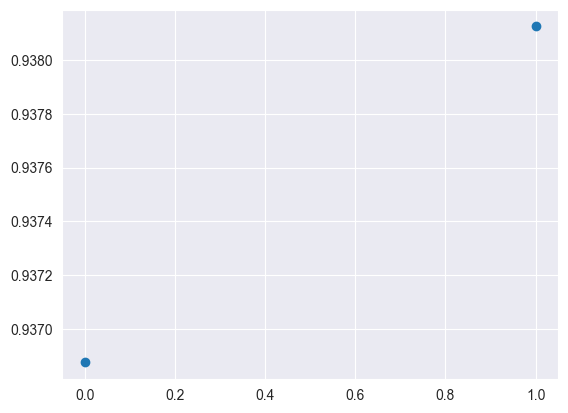

In [54]:
print("Optimizing Multi-Layer Perceptron model (shuffle parameter) with trial and error: ")
param_X = []
param_Y = []
param_shuffle = [True, False]
for i in param_shuffle:
    clr = MLPClassifier(max_iter=999999999, shuffle=i, solver='adam')
    clr.fit(X_train, y_train)
    param_X.append(i)
    param_Y.append(clr.score(X_test, y_test))
plt.scatter(param_X, param_Y)
print("The plot shows that the best value for shuffle is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
print()
plt.show()

In [55]:
print("Let's add our 3 new optimal parameters to the ones we got in the first part of round 1")
clr = MLPClassifier(max_iter=999999999, solver='adam', activation='logistic', alpha=0.0011, tol=math.exp(22),
                    shuffle=False, hidden_layer_sizes=(6,6,6,6,6,6))
clr.fit(X_train, y_train)
print(clr.score(X_test, y_test))

Let's add our 3 new optimal parameters to the ones we got in the first part of round 1
0.899375


Combining the parameters that give the optimal result together does not give an overall good accuracy. We therefore are left with one optimal model with the 'adam' solver below:

In [56]:
clr = MLPClassifier(max_iter=999999999, solver='adam', hidden_layer_sizes=(6,6,6,6,6,6))
clr.fit(X_train, y_train)
print("Accuracy: ", clr.score(X_test, y_test))

Accuracy:  0.925


We can then say that this result is a False Negatives.
It seems that adding parameters that work well alone do not automatically mean that they will be as efficient when we add all of them together.

### Round 2

In [57]:
print("Optimizing Multi-Layer Perceptron model using solver lbfgs, Round 2")

Optimizing Multi-Layer Perceptron model using solver lbfgs, Round 2


Optimizing Multi-Layer Perceptron model (Activation parameter) with trial and error: 
The plot shows that the best value for activation is relu with an accuracy of 0.930625


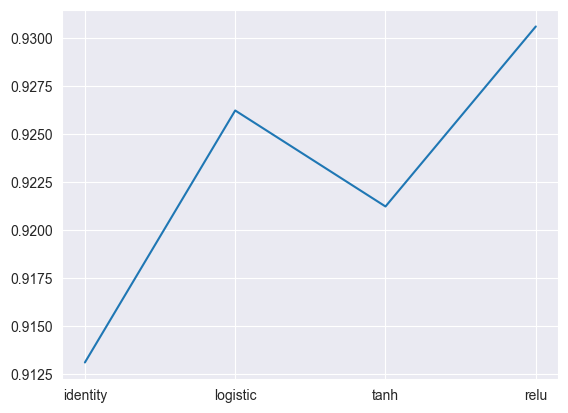

In [58]:
print("Optimizing Multi-Layer Perceptron model (Activation parameter) with trial and error: ")
param_X = []
param_Y = []
param_Activation = ['identity', 'logistic', 'tanh', 'relu']
for i in param_Activation:
    clr = MLPClassifier(max_iter=999999999, activation=i, solver='lbfgs')
    clr.fit(X_train, y_train)
    param_X.append(i)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for activation is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
print()
plt.show()

Optimizing Multi-Layer Perceptron model (alpha parameter) with trial and error: 
The plot shows that the best value for alpha is 0.0001 with an accuracy of 0.94125


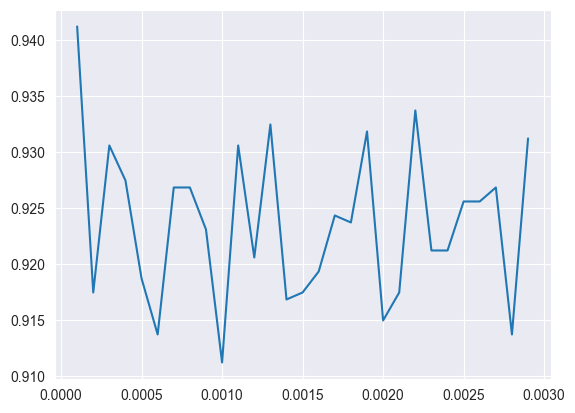

In [59]:
print("Optimizing Multi-Layer Perceptron model (alpha parameter) with trial and error: ")
param_X = []
param_Y = []
param_alpha = []
for i in range(1, 30):
    clr = MLPClassifier(max_iter=999999999, alpha=i/10000, solver='lbfgs')
    clr.fit(X_train, y_train)
    param_X.append(i/10000)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for alpha is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
print()
plt.show()

Optimizing Multi-Layer Perceptron model (tol (tolerance) parameter) with trial and error: 
The plot shows that the best value for tol is e^(--21) with an accuracy of 0.94125


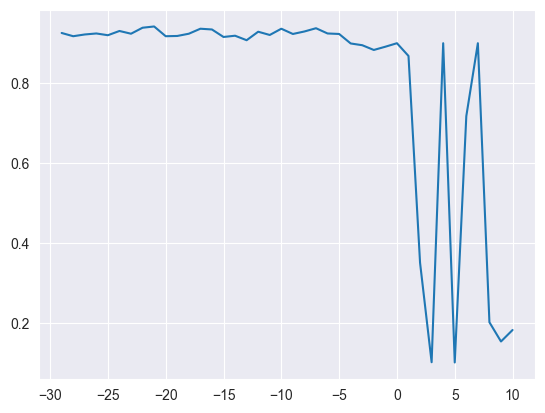

In [60]:
print("Optimizing Multi-Layer Perceptron model (tol (tolerance) parameter) with trial and error: ")
param_X = []
param_Y = []
for i in range(-10, 30):
    clr = MLPClassifier(max_iter=999999999, tol=math.exp(-i), solver='lbfgs')
    clr.fit(X_train, y_train)
    param_X.append(-i)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for tol is e^(-" + str(
    param_X[param_Y.index(max(param_Y))]) + ") with an accuracy of " + str(max(param_Y)))
print()
plt.show()

In [61]:
print("Let's add our 3 new optimal parameters to the ones we got in the first part of round 2")
clr = MLPClassifier(max_iter=999999999, solver='lbfgs', activation='relu', alpha=0.001, tol=math.exp(29))
clr.fit(X_train, y_train)
print(clr.score(X_test, y_test))

Let's add our 3 new optimal parameters to the ones we got in the first part of round 2
0.305625


Clearly, the parameters worked better separately.

The plot shows that the best number of layers for hidden_layer_sizes is [13, 5] with an accuracy of 0.96125


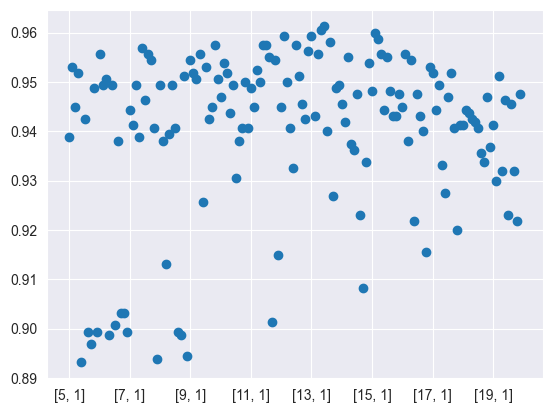

In [62]:
tempX = []
param_Y = []
for i in range(5, 20):
    nodes = ()
    for j in range(10):
        nodes = nodes + (i,)
        clr = MLPClassifier(max_iter=999999999, hidden_layer_sizes=nodes, solver='lbfgs')
        clr.fit(X_train, y_train)
        tempX.append(nodes)
        param_Y.append(clr.score(X_test, y_test))
param_X = []
for t in tempX:
    param_X.append(str([t[0], len(t)]))
plt.scatter(param_X, param_Y)
print("The plot shows that the best number of layers for hidden_layer_sizes is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
plt.xticks(numpy.arange(0, len(param_X), 20))
print()
plt.show()

Optimizing Multi-Layer Perceptron model (shuffle parameter) with trial and error: 
The plot shows that the best value for shuffle is False with an accuracy of 0.94125


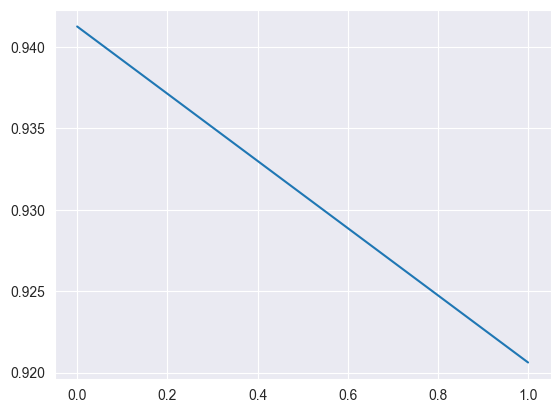

In [63]:
print("Optimizing Multi-Layer Perceptron model (shuffle parameter) with trial and error: ")
param_X = []
param_Y = []
param_shuffle = [True, False]
for i in param_shuffle:
    clr = MLPClassifier(max_iter=999999999, shuffle=i, solver='lbfgs')
    clr.fit(X_train, y_train)
    param_X.append(i)
    param_Y.append(clr.score(X_test, y_test))
plt.plot(param_X, param_Y)
print("The plot shows that the best value for shuffle is " + str(
    param_X[param_Y.index(max(param_Y))]) + " with an accuracy of " + str(max(param_Y)))
print()
plt.show()

In [64]:
print("Let's add our 3 new optimal parameters to the ones we got in the first part of round 2")
clr = MLPClassifier(max_iter=999999999, solver='lbfgs', activation='relu', alpha=0.001, tol=math.exp(29),
                    shuffle=False, hidden_layer_sizes=(9,9,9,9,9,9))
clr.fit(X_train, y_train)
print(clr.score(X_test, y_test))

Let's add our 3 new optimal parameters to the ones we got in the first part of round 2
0.100625


Combining the parameters that give the optimal result together does not give an overall good accuracy. We can conclude that it is a False positive.We therefore are left with one optimal model with the 'lbfgs' solver below:

In [65]:
clr = MLPClassifier(max_iter=999999999, solver='lbfgs', hidden_layer_sizes=(9,9,9,9,9,9))
clr.fit(X_train, y_train)
print("Accuracy: ", clr.score(X_test, y_test))

Accuracy:  0.90875
